# School grade prediction project

For this project I will be looking to create a model to predict student grades initially based on the Portugause school data set which I found here:
https://data.world/uci/student-performance/workspace/file?filename=student-mat.csv# 
The aim of the model will be to predict if a student is below a given grade. This is so that education providers are able to see which students are likely to need assistance to attain basic passing grades.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

For the start of the project I will perform analysis on the data to understand what is happening, correlations etc. This may also involve removal of certain columns that may no add value to the models.

In [2]:
#import the data from the file

analysis_df = pd.read_csv("D:\Simon\Documents\Degree\CondaPlace\envs\SchoolGradePredict\student-mat.csv", delimiter = ";")
#check the dataframe has data in it.
analysis_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Attributes for both student-mat.csv (Math course)datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) 
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

The list is above from: https://data.world/uci/student-performance/workspace/file?filename=student.txt and details what each of the columns are. 

In [3]:
#list the info for the columns to understand the datatypes of each one. 
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

This shows that there are a number of columns that are not integers and will be difficult to work with. 

For these will look how many columns will need transformation into an integer format.

In [4]:
#loop over all of the columns in the dataframe that are not of the integer data type
non_int_columns = [column for column in analysis_df.columns if analysis_df[column].dtype != 'int64']
#print out the list of items and the cound of items that are not integers
print(non_int_columns,len(non_int_columns))

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] 17


In [5]:
#list over the columns to identify the counts for each value. 
for col in non_int_columns:
    print(analysis_df[col].value_counts())


GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    307
R     88
Name: address, dtype: int64
GT3    281
LE3    114
Name: famsize, dtype: int64
T    354
A     41
Name: Pstatus, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
no     344
yes     51
Name: schoolsup, dtype: int64
yes    242
no     153
Name: famsup, dtype: int64
no     214
yes    181
Name: paid, dtype: int64
yes    201
no     194
Name: activities, dtype: int64
yes    314
no      81
Name: nursery, dtype: int64
yes    375
no      20
Name: higher, dtype: int64
yes    329
no      66
Name: internet, dtype: int64
no     263
yes    132
Name: romantic, 

From this I am not able to see all of the items in the list so cannot verify the data when it is transformed. As such I will list out the unique values with the column name to see what the options are.

In [6]:
for col in non_int_columns:
    print(analysis_df[col].unique(),col)

['GP' 'MS'] school
['F' 'M'] sex
['U' 'R'] address
['GT3' 'LE3'] famsize
['A' 'T'] Pstatus
['at_home' 'health' 'other' 'services' 'teacher'] Mjob
['teacher' 'other' 'services' 'health' 'at_home'] Fjob
['course' 'other' 'home' 'reputation'] reason
['mother' 'father' 'other'] guardian
['yes' 'no'] schoolsup
['no' 'yes'] famsup
['no' 'yes'] paid
['no' 'yes'] activities
['yes' 'no'] nursery
['yes' 'no'] higher
['no' 'yes'] internet
['no' 'yes'] romantic


In [7]:
#create a list of items that can be iterated over to see the values for each of the non integer based items. 
val_counts = []
for col in non_int_columns:
    val_counts.append(analysis_df[col].value_counts())
    

#print out the first set. 
print(val_counts[0:6])

[GP    349
MS     46
Name: school, dtype: int64, F    208
M    187
Name: sex, dtype: int64, U    307
R     88
Name: address, dtype: int64, GT3    281
LE3    114
Name: famsize, dtype: int64, T    354
A     41
Name: Pstatus, dtype: int64, other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64]


In [8]:
#print out a second set of items
print(val_counts[6:12])

[other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64, course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64, mother    273
father     90
other      32
Name: guardian, dtype: int64, no     344
yes     51
Name: schoolsup, dtype: int64, yes    242
no     153
Name: famsup, dtype: int64, no     214
yes    181
Name: paid, dtype: int64]


In [9]:
#print out the final set of variables so that all can be verified. 
print(val_counts[12:])

[yes    201
no     194
Name: activities, dtype: int64, yes    314
no      81
Name: nursery, dtype: int64, yes    375
no      20
Name: higher, dtype: int64, yes    329
no      66
Name: internet, dtype: int64, no     263
yes    132
Name: romantic, dtype: int64]


Now that I have the list of all of the values I can convert them to integer values and verify that they feature the correct values. 

I will first do this by creating a new dataframe and then convert the items to integers so they are usable in the neural networks and machine learning models. 

In [10]:
#create new dataframe for the transformations and machine learning models.
df_working = analysis_df.copy()
df_working.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
#import items to do a linear regression model and encode the non integer columns.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [12]:
#create a label encoder object. 
le = LabelEncoder()

#loop over all of the non integer columns and transform them to integers 
for col in non_int_columns:
    df_working[col] = le.fit_transform(df_working[col])

#print the infor again and check they are all integers.
df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int32
 16  famsup      395 non-null    int32
 17  paid        395 non-null    int32
 18  activities  395 non-null    int32
 19  nursery     395 non-null    int32
 20  higher      395 non-null    int3

In [13]:
#as per the above iteration of this I want to go through and verify the items that are in the list and confirm what the new items are
val_counts_working = []
for col in non_int_columns:
    val_counts_working.append(df_working[col].value_counts())


print(val_counts_working[0:6])

[0    349
1     46
Name: school, dtype: int64, 0    208
1    187
Name: sex, dtype: int64, 1    307
0     88
Name: address, dtype: int64, 0    281
1    114
Name: famsize, dtype: int64, 1    354
0     41
Name: Pstatus, dtype: int64, 2    141
3    103
0     59
4     58
1     34
Name: Mjob, dtype: int64]


In [14]:
print(val_counts_working[6:12])

[2    217
3    111
4     29
0     20
1     18
Name: Fjob, dtype: int64, 0    145
1    109
3    105
2     36
Name: reason, dtype: int64, 1    273
0     90
2     32
Name: guardian, dtype: int64, 0    344
1     51
Name: schoolsup, dtype: int64, 1    242
0    153
Name: famsup, dtype: int64, 0    214
1    181
Name: paid, dtype: int64]


In [15]:
print(val_counts_working[12:])

[1    201
0    194
Name: activities, dtype: int64, 1    314
0     81
Name: nursery, dtype: int64, 1    375
0     20
Name: higher, dtype: int64, 1    329
0     66
Name: internet, dtype: int64, 0    263
1    132
Name: romantic, dtype: int64]


# New values translations

|Category | Was | Mapped to|
| --- | --- | --- |
|School | GP | 0 |
|School | MS | 1 |
|Sex | F | 0 |
|Sex | M | 1 |
|Address | U | 1 |
|Address | R | 0 |
|Famsize | GT3 | 0 |
|Famsize | LE3 | 1 |
|Pstatus | A | 0 |
|Pstatus | T | 1 |
|Mjob | at_home | 0 |
|Mjob | health | 1 |
|Mjob | other | 2 |
|Mjob | services | 3 |
|Mjob | teacher | 4 |
|Fjob | teacher | 4 |
|Fjob | other | 2 |
|Fjob | services | 3 |
|Fjob | health | 1 |
|Fjob | at_home | 0 |
|Reason | course | 0 |
|Reason | other | 2 |
|Reason | home | 1 |
|Reason | reputation | 3 |
|Guardian | mother | 1 |
|Guardian | father | 0 |
|Guardian | other | 2 |
|schoolsup | yes | 1 |
|schoolsup | no | 0 |
|Famsup | no | 0 |
|Famsup | yes | 1 |
|Paid | no | 0 |
|Paid | yes | 1 |
|Activities | no | 0 |
|Activities | yes | 1 |
|Nursery | yes | 1 |
|Nursery | no | 0 |
|Higher | yes | 1 |
|Higher | no | 0 |
|Internet | no | 0 |
|Internet | yes | 1 |
|Romantic | no | 0 |
|Romantic | yes | 1 |


<AxesSubplot:>

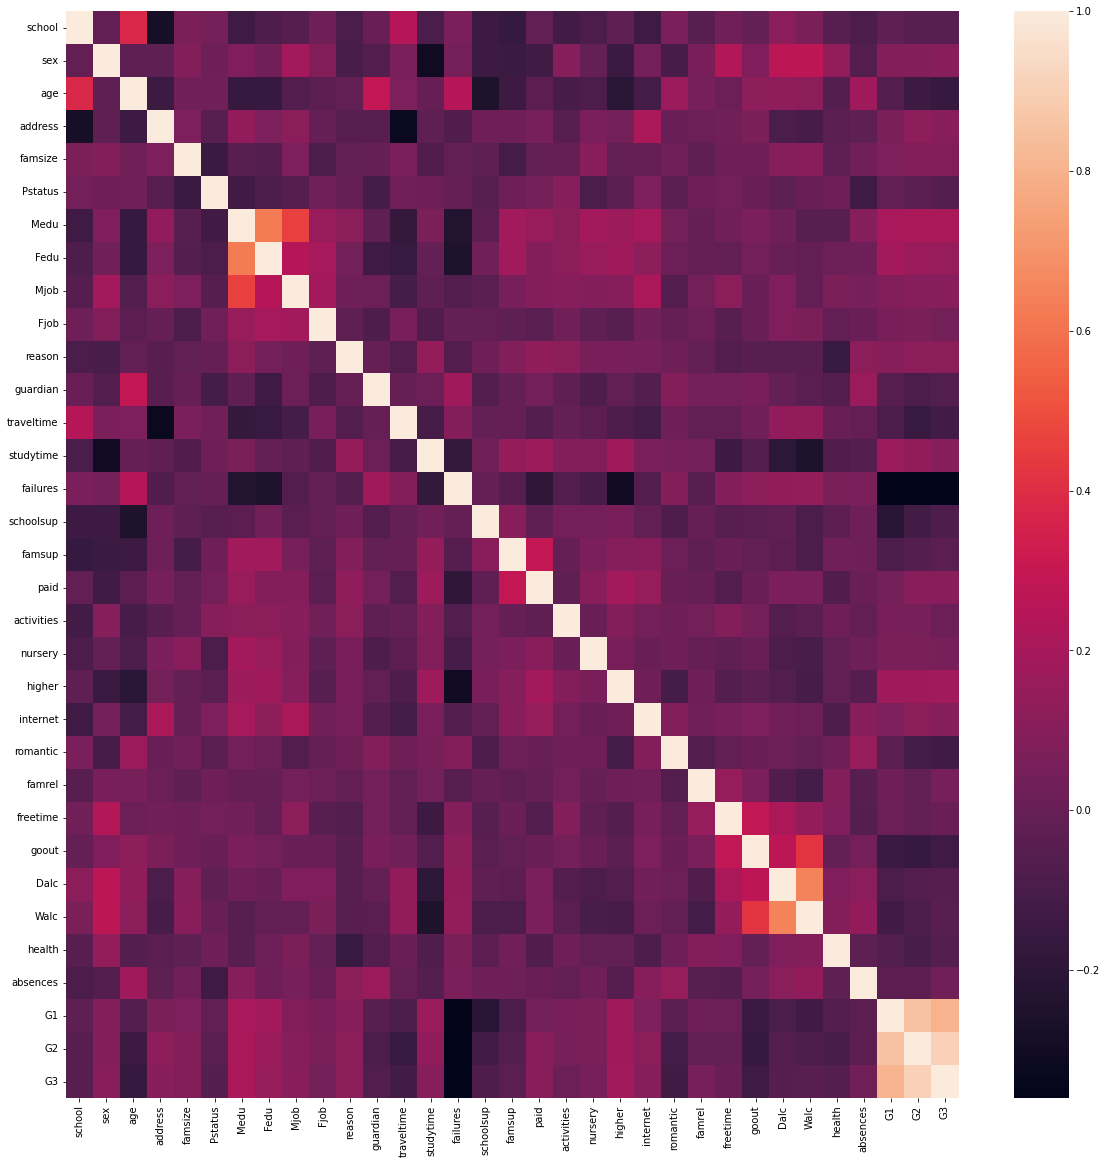

In [16]:
#Now that the new values are mapped I can see any potential correlations in the data
plt.figure(figsize=(20,20))
sns.heatmap(df_working.corr())

In [17]:
#create the training and test split 70:30
x= df_working.drop('G3',axis=1)
y=df_working['G3']
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.3)

x_train.shape

(276, 32)

In [18]:
regression_G3_score = LinearRegression()

regression_G3_score.fit(x_train,y_train)



LinearRegression()

In [19]:
score_prediction = regression_G3_score.predict(x_test)
score_prediction_train = regression_G3_score.predict(x_train)

print("Root mean square error test data: " + str(np.sqrt(mean_squared_error(y_test,score_prediction))))
print("Mean absolute error test data: " + str(mean_absolute_error(y_test,score_prediction)))
print("R2 score test data: " + str(r2_score(y_test,score_prediction)))

print("Root Mean square error train data: " + str(np.sqrt(mean_squared_error(y_train,score_prediction_train))))
print("Mean absolute error train data: " + str(mean_absolute_error(y_train,score_prediction_train)))
print("R2 score train data: " + str(r2_score(y_train,score_prediction_train)))


Root mean square error test data: 1.816499763315606
Mean absolute error test data: 1.3675782854924798
R2 score test data: 0.8353733289332167
Root Mean square error train data: 1.8578415320927608
Mean absolute error train data: 1.2297036406531032
R2 score train data: 0.8374274083860604


From this I can see that on the test data it appears that the error is around 2 grades. This equates to 10% away from the grade on the scale of 0-20.

As this is for all variables I would like to see scatter plots to assess correlation to the grade.

I would also like to see the distribution of the grades. 

From https://www.studyineurope.eu/study-in-portugal/grades i can see that under 10 is a fail. 10 - 11 is an E, 12-13 D, 14-15 C, 16-17 B & 18-20 A

In [20]:
#Print the values of the overall grades in 4 bins and then each category. 
print(analysis_df['G3'].value_counts(bins = 4))
print(analysis_df['G3'].value_counts())

(10.0, 15.0]     169
(5.0, 10.0]      140
(-0.021, 5.0]     46
(15.0, 20.0]      40
Name: G3, dtype: int64
10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64


<AxesSubplot:xlabel='G3', ylabel='Count'>

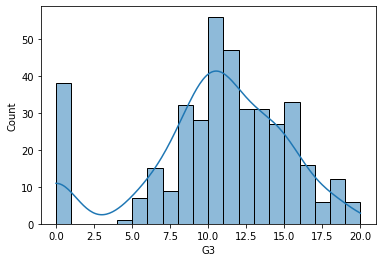

In [21]:
#As there are 20 different grades from 0 - 20 I have chosen 20 bins to see the all of the grades.
sns.histplot(df_working['G3'],bins = 20, kde = True)

<AxesSubplot:xlabel='G3', ylabel='Count'>

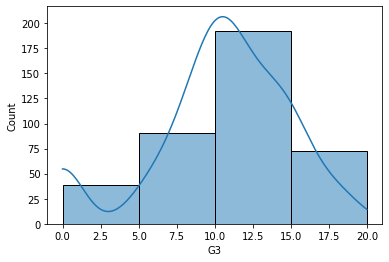

In [22]:
#grouped histogram to show the bins in groups of 5
sns.histplot(df_working['G3'], bins = 4, kde = True)

d:\Simon\Documents\Degree\CondaPlace\envs\SchoolGradePredict\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='G3'>

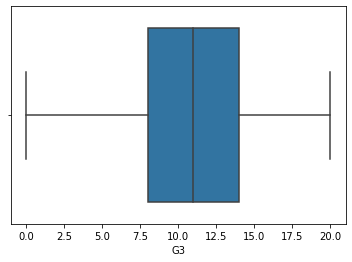

In [23]:
#A box plot of the grade details to see the distribution. 
sns.boxplot(df_working['G3'])

In [24]:
#create a list to create scatter plots against
col_list = []

for ele in df_working.columns:
    if ele != 'G3':
        col_list.append(ele)

len(col_list)

32

In [25]:
#for each column create a scatter plot to compate the variables against the grades. 
#plt.figure(figsize=(2,2))
#for col in col_list:
 
  #  df_working.plot.scatter(x="G3", y=col)



The scatter plots were not the most informative and infact were basically a replication of the heatmap that I did earlier in the project. As such this is not the best way to select parameters. 

With a quick search I found the following: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. This relates to the model though and not feratures.

For the feature selection can use https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression 

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_classif

In [27]:
# I wanted to see the best column names so i used the following: https://stackoverflow.com/questions/46927545/get-feature-names-of-selectkbest-function-python adapted to the below

#create selector object with the f_regression and a k value of 10 so top 10 items.
selector = SelectKBest(f_regression, k=10)
#fit and transform the data
x_fregress_10 = selector.fit_transform(x, y)
# get the names of the columns
x.columns[selector.get_support(indices=True)]
# create a list of the names
vector_names = list(x.columns[selector.get_support(indices=True)])
print(vector_names)



['age', 'Medu', 'Fedu', 'reason', 'failures', 'higher', 'romantic', 'goout', 'G1', 'G2']


In [28]:
x_train_fr10,x_test_fr10, y_train_fr10,y_test_fr10 = train_test_split(x_fregress_10, y, test_size=0.3)

In [29]:
regression_G3_score_fr10 = LinearRegression()

regression_G3_score_fr10.fit(x_train_fr10,y_train_fr10)


LinearRegression()

In [30]:
score_prediction = regression_G3_score_fr10.predict(x_test_fr10)
score_prediction_train = regression_G3_score_fr10.predict(x_train_fr10)

print("Root mean square error test data: " + str(np.sqrt(mean_squared_error(y_test_fr10,score_prediction))))
print("Mean absolute error test data: " + str(mean_absolute_error(y_test_fr10,score_prediction)))
print("R2 score test data: " + str(r2_score(y_test_fr10,score_prediction)))

print("Root Mean square error train data: " + str(np.sqrt(mean_squared_error(y_train_fr10,score_prediction_train))))
print("Mean absolute error train data: " + str(mean_absolute_error(y_train_fr10,score_prediction_train)))
print("R2 score train data: " + str(r2_score(y_train_fr10,score_prediction_train)))

Root mean square error test data: 1.949015176269677
Mean absolute error test data: 1.141774823526546
R2 score test data: 0.8380904572359037
Root Mean square error train data: 1.8929523142453157
Mean absolute error train data: 1.1197432328771404
R2 score train data: 0.8192969142046818


In [31]:
#want to loop through from k=2 to k=31 so 29 iterrations need a list for RMSE, MAE and R2 a val for k
#create lists to store results 
rmse_vals_test = []
rmse_vals_train = []
mae_vals_test = []
mae_vals_train = []
r2_vals_test = []
r2_vals_train = []
col_names = []
#create a model
regression_G3_kloop = LinearRegression()
#start at 2 columns.
k_val = 2
#loop over 30 times for the different k values 
for i in range(30):
    #create selector and get column names 
    selector = SelectKBest(f_regression, k=k_val+i)
    x_fregress_loop = selector.fit_transform(x, y)
    x.columns[selector.get_support(indices=True)]
    vector_names_loop = list(x.columns[selector.get_support(indices=True)])
    #add the list of columns to the list
    col_names.append(vector_names_loop)
    #test train split
    x_train_fr_loop,x_test_fr_loop, y_train_fr_loop,y_test_fr_loop = train_test_split(x_fregress_loop, y, test_size=0.3)
    #train the model
    regression_G3_kloop.fit(x_train_fr_loop,y_train_fr_loop)

    #predict scores
    score_prediction_loop = regression_G3_kloop.predict(x_test_fr_loop)
    score_prediction_train_loop = regression_G3_kloop.predict(x_train_fr_loop) 

    #add the RMSE, MAE and R2 values for test and train 
    rmse_vals_test.append(np.around(np.sqrt(mean_squared_error(y_test_fr_loop,score_prediction_loop)), decimals=4))
    rmse_vals_train.append(np.around(np.sqrt(mean_squared_error(y_train_fr_loop,score_prediction_train_loop)), decimals=4))

    mae_vals_test.append(np.around(mean_absolute_error(y_test_fr_loop,score_prediction_loop), decimals=4))
    mae_vals_train.append(np.around(mean_absolute_error(y_train_fr_loop,score_prediction_train_loop), decimals=4))

    r2_vals_test.append(np.around(r2_score(y_test_fr_loop,score_prediction_loop), decimals=4))
    r2_vals_train.append(np.around(r2_score(y_train_fr_loop,score_prediction_train_loop), decimals=4))
    
    

In [32]:
#find the lowest values for the training predictions on RMSE and MAE then the max r2 val. The addition of the 2 also accounts for the k value above starting at 2
rmse_lowest = np.argmin(rmse_vals_train)
print("best k val rmse: " + str(rmse_lowest+2)," with a val of: "+str(rmse_vals_train[rmse_lowest])," columns are: "+str(col_names[rmse_lowest]),rmse_lowest)
mae_lowest = np.argmin(mae_vals_train)
print("best k val mae: " + str(mae_lowest+2)," with a val of: "+str(mae_vals_train[mae_lowest])," columns are: "+str(col_names[mae_lowest]),mae_lowest)
r2_highest = np.argmax(r2_vals_train)
print("best k val r2: " + str(r2_highest+2)," with a val of: "+str(r2_vals_train[r2_highest])," columns are: "+str(col_names[r2_highest]),r2_highest)
if((rmse_lowest == mae_lowest)&(r2_highest!=rmse_lowest)):
    print("r2 value at low RMSE, MAE: " + str(r2_vals_train[rmse_lowest]),rmse_lowest)
elif(rmse_lowest != mae_lowest):
    print("r2 value at low RMSE: " + str(r2_vals_train[rmse_lowest]),rmse_lowest+2)
    print("r2 value at low MAE: " + str(r2_vals_train[mae_lowest]),mae_lowest+2)
else:
    print("all matched values")


best k val rmse: 4  with a val of: 1.5219  columns are: ['Medu', 'failures', 'G1', 'G2'] 2
best k val mae: 4  with a val of: 0.8914  columns are: ['Medu', 'failures', 'G1', 'G2'] 2
best k val r2: 4  with a val of: 0.8769  columns are: ['Medu', 'failures', 'G1', 'G2'] 2
all matched values


In [33]:
#find the lowest values for the test predictions on RMSE and MAE then the max r2 val. The addition of the 2 also accounts for the k value above starting at 2
rmse_lowest = np.argmin(rmse_vals_test)
print("best k val rmse: " + str(rmse_lowest+2)," with a val of: "+str(rmse_vals_test[rmse_lowest])," columns are: "+str(col_names[rmse_lowest]),rmse_lowest)
mae_lowest = np.argmin(mae_vals_test)
print("best k val mae: " + str(mae_lowest+2)," with a val of: "+str(mae_vals_test[mae_lowest])," columns are: "+str(col_names[mae_lowest]),mae_lowest)
r2_highest = np.argmax(r2_vals_test)
print("best k val r2: " + str(r2_highest+2)," with a val of: "+str(r2_vals_test[r2_highest])," columns are: "+str(col_names[r2_highest]),r2_highest)
if((rmse_lowest == mae_lowest)&(r2_highest!=rmse_lowest)):
    print("r2 value at low RMSE, MAE: " + str(r2_vals_test[rmse_lowest]),rmse_lowest)
elif(rmse_lowest != mae_lowest):
    print("r2 value at low RMSE: " + str(r2_vals_test[rmse_lowest]),rmse_lowest+2)
    print("r2 value at low MAE: " + str(r2_vals_test[mae_lowest]),mae_lowest+2)
else:
    print("all matched values")

best k val rmse: 2  with a val of: 1.6218  columns are: ['G1', 'G2'] 0
best k val mae: 2  with a val of: 1.0127  columns are: ['G1', 'G2'] 0
best k val r2: 2  with a val of: 0.8697  columns are: ['G1', 'G2'] 0
all matched values


In [34]:
#have a look at the highest contributing attributes for the first 5 k values. 
col_names[:5]

[['G1', 'G2'],
 ['failures', 'G1', 'G2'],
 ['Medu', 'failures', 'G1', 'G2'],
 ['Medu', 'failures', 'higher', 'G1', 'G2'],
 ['age', 'Medu', 'failures', 'higher', 'G1', 'G2']]

From the data above I found that the MAE for both was close to 1 and the RMSE was around 1.5. I would think this is acceptable for guessing if a student was likely to fail or what grade they would get. it is +- 5% as it is out of 20. This would provide some insights into which students may require assistance to get a basic pass in these subjects.

The main issue on this is that key attributes seem to be the G1 and G2 scores that are interim values. These would not be available if you wanted to make an intervention early on in the childs carrer.

I will now go onto the neural network and see if i can achieve better results. 

In [35]:
#import the elements required for the neural networks 
from keras import models
from keras import layers
from keras import regularizers
from keras import callbacks

from keras.utils.np_utils import to_categorical

In [36]:
#normalise the data around the mean
train_data_rnn = x.copy()
mean = train_data_rnn.mean(axis=0)
train_data_rnn -= mean
std = train_data_rnn.std(axis=0)
train_data_rnn /= std

train_data_rnn -= mean
train_data_rnn /= std

train_data_rnn
#x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-1.491530,-2.841206,-12.283642,-0.582036,-2.038270,-12.544426,-1.467899,-1.068619,-3.207543,-0.336276,...,-2.205651,-4.329617,-3.475109,-2.073513,-2.268926,-2.557392,-2.843418,-0.708786,-3.822936,-3.181473
1,-1.491530,-2.841206,-12.897785,-0.582036,-2.038270,-1.821676,-3.971142,-3.602016,-3.207543,-3.018303,...,-2.205651,-3.085831,-3.475109,-2.880363,-2.268926,-2.557392,-2.843418,-0.740012,-3.822936,-3.252150
2,-1.491530,-2.841206,-14.126071,-0.582036,2.820006,-1.821676,-3.971142,-3.602016,-3.207543,-3.018303,...,-2.205651,-4.329617,-3.475109,-3.687212,-1.008560,-1.351613,-2.843418,-0.646334,-3.641400,-3.040119
3,-1.491530,-2.841206,-14.126071,-0.582036,-2.038270,-1.821676,-1.467899,-2.757550,-2.543836,-1.677290,...,2.277296,-5.573403,-4.477389,-3.687212,-2.268926,-2.557392,-1.808727,-0.771238,-2.915253,-2.616059
4,-1.491530,-2.841206,-13.511928,-0.582036,-2.038270,-1.821676,-2.302313,-1.913085,-1.880129,-3.018303,...,-2.205651,-4.329617,-3.475109,-3.687212,-2.268926,-1.954503,-1.808727,-0.740012,-3.732168,-2.898766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,8.202627,1.159976,-11.055356,-0.582036,2.820006,-12.544426,-3.136728,-2.757550,-1.216422,-1.677290,...,-2.205651,-3.085831,-1.470549,-2.073513,1.512172,-0.145833,-2.326073,-0.630721,-3.459863,-2.969443
391,8.202627,1.159976,-12.897785,-0.582036,2.820006,-1.821676,-2.302313,-3.602016,-1.216422,-1.677290,...,-2.205651,-6.817190,-2.472829,-1.266663,0.251806,-0.748723,-3.360764,-0.755625,-3.006021,-2.474705
392,8.202627,1.159976,-10.441213,-6.342696,-2.038270,-1.821676,-3.971142,-3.602016,-1.880129,-3.018303,...,-2.205651,-3.085831,-1.470549,-2.880363,0.251806,-1.351613,-2.843418,-0.755625,-3.369094,-3.040119
393,8.202627,1.159976,-12.283642,-6.342696,2.820006,-1.821676,-2.302313,-2.757550,-1.216422,-3.018303,...,-2.205651,-4.329617,-2.472829,-4.494062,0.251806,-0.748723,-1.808727,-0.802464,-3.278326,-2.757412


In [37]:
#test train split of the data. 
x_train_rnn,x_test_rnn, y_train_rnn,y_test_rnn = train_test_split(train_data_rnn, y, test_size=0.3)

In [38]:
#build a basic neural network with 4 layers  and output
def build_model_reg():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(x_train_rnn.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [39]:
#build a model and view a summary
model_reg = build_model_reg()
model_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11,489
Trainable params: 11,489
Non-trainable params: 0
_________________________________________________________________


In [40]:
#train the model with 300 epochs
model_reg.fit(x_train_rnn,y_train_rnn, epochs = 300)

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 59.1375 - mae: 6.5572
Epoch 2/300
9/9 [==============================] - 0s 997us/step - loss: 24.1499 - mae: 3.7078
Epoch 3/300
9/9 [==============================] - 0s 873us/step - loss: 21.8509 - mae: 3.4872
Epoch 4/300
9/9 [==============================] - 0s 997us/step - loss: 20.4453 - mae: 3.4205
Epoch 5/300
9/9 [==============================] - 0s 873us/step - loss: 20.4875 - mae: 3.4401
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 17.8258 - mae: 3.2590
Epoch 7/300
9/9 [==============================] - 0s 997us/step - loss: 17.7601 - mae: 3.2611
Epoch 8/300
9/9 [==============================] - 0s 748us/step - loss: 16.7401 - mae: 3.1358
Epoch 9/300
9/9 [==============================] - 0s 873us/step - loss: 17.5973 - mae: 3.1907
Epoch 10/300
9/9 [==============================] - 0s 748us/step - loss: 15.7774 - mae: 3.0465
Epoch 11/300
9/9 [==============================] - 0

In [41]:
#evaluate the model 
mse, mae = model_reg.evaluate(x_test_rnn, y_test_rnn)
#take the square root of mse so it is rmse
rmse_rnn = np.sqrt(mse)
#print the measures
print(rmse_rnn, mae)

4/4 [==============================] - 0s 997us/step - loss: 19.2583 - mae: 3.4562
4.388426315031499 3.456176280975342


In [42]:
#build a larger model with convolution regularisation and droput. 
def build_model_reg_2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(x_train_rnn.shape[1],)))
    model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Reshape((64,1)))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Conv1D(128,4,activation='relu'))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Conv1D(64,8,activation='relu'))
    model.add(layers.Conv1D(32,4,activation='relu'))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.01), activation='relu'))
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.05), activation='relu'))
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.006), activation='relu'))
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.009), activation='relu'))
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.002), activation='relu'))
    model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Reshape((64,1)))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Conv1D(128,4,activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [43]:
model_reg_2 = build_model_reg_2()
model_reg_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 reshape (Reshape)           (None, 64, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 63, 64)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 128)          

In [44]:
#train the model with 500 epochs
model_reg_2.fit(x_train_rnn,y_train_rnn, epochs = 500)

Epoch 1/500
9/9 [==============================] - 3s 28ms/step - loss: 326.0627 - mae: 11.3700
Epoch 2/500
9/9 [==============================] - 0s 28ms/step - loss: 179.4683 - mae: 7.5027
Epoch 3/500
9/9 [==============================] - 0s 29ms/step - loss: 118.3904 - mae: 4.4621
Epoch 4/500
9/9 [==============================] - 0s 29ms/step - loss: 110.8285 - mae: 4.5695
Epoch 5/500
9/9 [==============================] - 0s 30ms/step - loss: 106.1664 - mae: 4.8480
Epoch 6/500
9/9 [==============================] - 0s 30ms/step - loss: 108.7439 - mae: 5.4354
Epoch 7/500
9/9 [==============================] - 0s 28ms/step - loss: 91.9145 - mae: 4.8108
Epoch 8/500
9/9 [==============================] - 0s 26ms/step - loss: 76.9595 - mae: 3.9018
Epoch 9/500
9/9 [==============================] - 0s 28ms/step - loss: 76.2658 - mae: 4.3951
Epoch 10/500
9/9 [==============================] - 0s 30ms/step - loss: 62.8557 - mae: 3.7849
Epoch 11/500
9/9 [==============================] - 

In [45]:
#evaluate the model 
mse, mae = model_reg_2.evaluate(x_test_rnn, y_test_rnn)
#take the square root of mse so it is rmse
rmse_rnn = np.sqrt(mse)
#print the measures
print(rmse_rnn, mae)

4/4 [==============================] - 0s 7ms/step - loss: 26.3441 - mae: 3.4571
5.132648807975346 3.457054615020752


Looking at this the training seems to be ok but when looking at test data the MAE and MSE of around 6 and 4 respectively are a lot worse than the basic model. 

It is at this point that i feel the regression is not correct and I should do classification in grades similar to the research paper. 

This is upon looking at the study in europe site as above for attainnig the grades. It does not appear to have any decimal grades so it will be better to attempt to classify the results rather than predict a likely value for them. 

In [46]:

#when splitting the data there is between 20 and 21 options so it causes the netwoek to have an error.
#this was from testing where errors would happen depending on the splitting of the data rerutning 20 or 21 lines
y_test_nn = to_categorical(y_test,21)
y_train_nn = to_categorical(y_train,21)
print(y_train_nn.shape,y_test_nn.shape)
print(y_test_nn[1])
print(y_train_nn[1])

(276, 21) (119, 21)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [47]:
#create a basic model for a classification NN. 
def build_model_class():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(21, activation="softmax"))
 
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    return model

In [48]:
#build a basic model for the 
model_class = build_model_class()

model_class.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               4224      
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 21)                693       
                                                                 
Total params: 15,253
Trainable params: 15,253
Non-trainable params: 0
_________________________________________________________________


In [49]:
#build the model with 200 epochs 

model_class.fit(x_train,y_train_nn, epochs = 200)

Epoch 1/200
9/9 [==============================] - 1s 2ms/step - loss: 3.1234 - accuracy: 0.0761
Epoch 2/200
9/9 [==============================] - 0s 1ms/step - loss: 2.7316 - accuracy: 0.1087
Epoch 3/200
9/9 [==============================] - 0s 997us/step - loss: 2.5989 - accuracy: 0.2065
Epoch 4/200
9/9 [==============================] - 0s 1ms/step - loss: 2.5095 - accuracy: 0.2283
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 2.3760 - accuracy: 0.2754
Epoch 6/200
9/9 [==============================] - 0s 873us/step - loss: 2.2724 - accuracy: 0.2717
Epoch 7/200
9/9 [==============================] - 0s 997us/step - loss: 2.1852 - accuracy: 0.3116
Epoch 8/200
9/9 [==============================] - 0s 1ms/step - loss: 2.0850 - accuracy: 0.3188
Epoch 9/200
9/9 [==============================] - 0s 811us/step - loss: 2.0005 - accuracy: 0.3587
Epoch 10/200
9/9 [==============================] - 0s 873us/step - loss: 1.9373 - accuracy: 0.3696
Epoch 11/200
9/9 [=

In [50]:
#test the model to see the results 
model_class.evaluate(x_test, y_test_nn)


4/4 [==============================] - 0s 1ms/step - loss: 4.8253 - accuracy: 0.3193


[4.825283050537109, 0.3193277418613434]

This first model only has an accuracy of 31% for the test data which is not ideal in predicting anything. as it is less than 50% it would be better to randomly guess than to use the basic model as it is. 
I will make another more complex model to see if i can get a better prediction. 

In [51]:
def build_model_class_2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(x_train_rnn.shape[1],)))
    model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Reshape((64,1)))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Conv1D(128,4,activation='relu'))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Conv1D(64,8,activation='relu'))
    model.add(layers.Conv1D(32,4,activation='relu'))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Flatten())
    model.add(layers.Dense(21, activation="softmax"))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [52]:
#build a basic model for the 
model_class_2 = build_model_class_2()

model_class_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 reshape_2 (Reshape)         (None, 64, 1)             0         
                                                                 
 conv1d_8 (Conv1D)           (None, 63, 64)            192       
                                                                 
 conv1d_9 (Conv1D)           (None, 60, 128)          

In [53]:
model_class_2.fit(x_train,y_train_nn, epochs = 1000)

Epoch 1/1000
9/9 [==============================] - 1s 16ms/step - loss: 5.9260 - accuracy: 0.1159
Epoch 2/1000
9/9 [==============================] - 0s 14ms/step - loss: 5.3805 - accuracy: 0.1413
Epoch 3/1000
9/9 [==============================] - 0s 14ms/step - loss: 5.1108 - accuracy: 0.1413
Epoch 4/1000
9/9 [==============================] - 0s 14ms/step - loss: 4.8480 - accuracy: 0.1196
Epoch 5/1000
9/9 [==============================] - 0s 14ms/step - loss: 4.6015 - accuracy: 0.1594
Epoch 6/1000
9/9 [==============================] - 0s 14ms/step - loss: 4.3214 - accuracy: 0.1667
Epoch 7/1000
9/9 [==============================] - 0s 14ms/step - loss: 3.9478 - accuracy: 0.2246
Epoch 8/1000
9/9 [==============================] - 0s 13ms/step - loss: 3.6701 - accuracy: 0.2246
Epoch 9/1000
9/9 [==============================] - 0s 14ms/step - loss: 3.4865 - accuracy: 0.2500
Epoch 10/1000
9/9 [==============================] - 0s 13ms/step - loss: 3.3262 - accuracy: 0.2754
Epoch 11/

In [54]:
#test the model to see the results 
model_class_2.evaluate(x_test, y_test_nn)

4/4 [==============================] - 0s 5ms/step - loss: 7.5838 - accuracy: 0.3277


[7.583767890930176, 0.32773110270500183]

In [55]:
callbacks_list = [callbacks.EarlyStopping(monitor='accuracy',patience=20,)
    #callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,)
]

In [56]:
model_class_3 = build_model_class_2()
model_class_3.fit(x_train,y_train_nn, epochs = 1000,callbacks = callbacks_list)

Epoch 1/1000
9/9 [==============================] - 1s 13ms/step - loss: 5.9627 - accuracy: 0.0797
Epoch 2/1000
9/9 [==============================] - 0s 13ms/step - loss: 5.3614 - accuracy: 0.1449
Epoch 3/1000
9/9 [==============================] - 0s 14ms/step - loss: 5.0918 - accuracy: 0.1304
Epoch 4/1000
9/9 [==============================] - 0s 13ms/step - loss: 4.8965 - accuracy: 0.1196
Epoch 5/1000
9/9 [==============================] - 0s 13ms/step - loss: 4.6059 - accuracy: 0.1232
Epoch 6/1000
9/9 [==============================] - 0s 13ms/step - loss: 4.3270 - accuracy: 0.2065
Epoch 7/1000
9/9 [==============================] - 0s 13ms/step - loss: 4.0113 - accuracy: 0.2065
Epoch 8/1000
9/9 [==============================] - 0s 15ms/step - loss: 3.6157 - accuracy: 0.3043
Epoch 9/1000
9/9 [==============================] - 0s 14ms/step - loss: 3.3592 - accuracy: 0.3152
Epoch 10/1000
9/9 [==============================] - 0s 14ms/step - loss: 3.1831 - accuracy: 0.3188
Epoch 11/

In [57]:
#test the model to see the results 
bce, accc = model_class_3.evaluate(x_test, y_test_nn)
print(accc*100)

4/4 [==============================] - 0s 5ms/step - loss: 5.7450 - accuracy: 0.2941
29.411765933036804


In [58]:
model_class_4 = build_model_class_2()
model_class_4.fit(x_train,y_train_nn, epochs = 1000,callbacks = callbacks_list)

Epoch 1/1000
9/9 [==============================] - 2s 14ms/step - loss: 5.8980 - accuracy: 0.0906
Epoch 2/1000
9/9 [==============================] - 0s 13ms/step - loss: 5.3584 - accuracy: 0.0942
Epoch 3/1000
9/9 [==============================] - 0s 13ms/step - loss: 5.0723 - accuracy: 0.1196
Epoch 4/1000
9/9 [==============================] - 0s 13ms/step - loss: 4.8153 - accuracy: 0.1268
Epoch 5/1000
9/9 [==============================] - 0s 13ms/step - loss: 4.5737 - accuracy: 0.1594
Epoch 6/1000
9/9 [==============================] - 0s 13ms/step - loss: 4.0812 - accuracy: 0.2355
Epoch 7/1000
9/9 [==============================] - 0s 14ms/step - loss: 3.8084 - accuracy: 0.2899
Epoch 8/1000
9/9 [==============================] - 0s 15ms/step - loss: 3.5055 - accuracy: 0.2971
Epoch 9/1000
9/9 [==============================] - 0s 14ms/step - loss: 3.2873 - accuracy: 0.2790
Epoch 10/1000
9/9 [==============================] - 0s 14ms/step - loss: 3.1765 - accuracy: 0.3080
Epoch 11/

In [59]:
def build_model_class_3(x_training):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(x_training.shape[1],)))
    #model.add(layers.Dense(128,kernel_regularizer=regularizers.l1(0.02), activation='relu'))
    #model.add(layers.Dense(256,kernel_regularizer=regularizers.l1(0.005), activation='relu'))
    #model.add(layers.Dense(64,kernel_regularizer=regularizers.l1(0.016), activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Reshape((64,1)))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Conv1D(128,4,activation='relu'))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Conv1D(64,8,activation='relu'))
    model.add(layers.Conv1D(32,4,activation='relu'))
    model.add(layers.Conv1D(64,2,activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(21, activation="softmax"))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [60]:
acc_vals_test = []

col_names_class = []
#create a model

#model_class_4 = build_model_class_3()
#model_class_4.fit(x_train,y_train_nn, epochs = 1000,callbacks = callbacks_list)
#start at 2 columns.
k_val = 2
#loop over 30 times for the different k values 
for i in range(30):
    #create selector and get column names 

    selector = SelectKBest(mutual_info_classif, k=k_val+i)
    x_fregress_loop = selector.fit_transform(x, y)
    x.columns[selector.get_support(indices=True)]
    vector_names_loop = list(x.columns[selector.get_support(indices=True)])
    #add the list of columns to the list
    col_names_class.append(vector_names_loop)
    #test train split
    x_train_fr_loop,x_test_fr_loop, y_train_fr_loop,y_test_fr_loop = train_test_split(x_fregress_loop, y, test_size=0.2)
    #set the size of the target values.
    y_test_nn_loop = to_categorical(y_test_fr_loop,21)
    y_train_nn_loop = to_categorical(y_train_fr_loop,21)
    #train the model
    model_class_4 = build_model_class_3(x_train_fr_loop)
    model_class_4.fit(x_train_fr_loop,y_train_nn_loop, epochs = 250,callbacks = callbacks_list,verbose = 0)

    #evaluate the model on the training data.
    bce, acc = model_class_4.evaluate(x_test_fr_loop,y_test_nn_loop, verbose = 0)
     

    #add the accuracy for the test values to a list. 
    acc_vals_test.append(acc)


In [61]:
print(acc_vals_test)
acc_highest = np.argmax(acc_vals_test)
print("best k val acc: " + str(acc_highest+2)," with a val of: "+str(acc_vals_test[acc_highest]*100)," columns are: "+str(col_names[acc_highest]),acc_highest)

[0.3544303774833679, 0.4430379867553711, 0.3417721390724182, 0.37974682450294495, 0.3417721390724182, 0.39240506291389465, 0.3544303774833679, 0.3291139304637909, 0.3544303774833679, 0.4556961953639984, 0.26582279801368713, 0.37974682450294495, 0.37974682450294495, 0.2405063360929489, 0.3291139304637909, 0.29113924503326416, 0.3291139304637909, 0.29113924503326416, 0.3037974536418915, 0.20253165066242218, 0.2405063360929489, 0.3037974536418915, 0.3544303774833679, 0.2405063360929489, 0.26582279801368713, 0.29113924503326416, 0.2531645596027374, 0.2278480976819992, 0.3037974536418915, 0.26582279801368713]
best k val acc: 11  with a val of: 45.56961953639984  columns are: ['age', 'Medu', 'Fedu', 'reason', 'traveltime', 'failures', 'higher', 'romantic', 'goout', 'G1', 'G2'] 9


While looping through the different parameters it seems that less is better again. The list is showin many results under 40% and the best being an outlier. It seems that I will nt be improving from here. I have tried with regularizers and dropout but this appears to yield worse results. 

In [62]:
#create a knn classifier to predict an accuracy score. 
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=10)

In [63]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [64]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3277310924369748


A simple KNN classifier above has shown a poor accuracy score. The neural network was better performing than this so maybe the network is a bit better. 

In [65]:
acc_vals_knn =0
col_names_knn = 0
current_best_acc = 0
best_k_knn = 0 
#create a model
for j in range(20):
    knn_loop = KNeighborsClassifier(n_neighbors=j+2)
    #start at 2 columns.
    k_val = 2
    #loop over 30 times for the different k values 
    for i in range(30):
        #create selector and get column names 
        selector = SelectKBest(mutual_info_classif, k=k_val+i)
        x_fregress_loop = selector.fit_transform(x, y)
        x.columns[selector.get_support(indices=True)]
        vector_names_loop = list(x.columns[selector.get_support(indices=True)])
        #add the list of columns to the list
        #col_names_knn.append(vector_names_loop)
        #test train split
        x_train_knn_loop,x_test_knn_loop, y_train_knn_loop,y_test_knn_loop = train_test_split(x, y, test_size=0.3)
        #train the model
        knn.fit(x_train_knn_loop, y_train_knn_loop)
        y_pred_knn = knn.predict(x_test_knn_loop)
        current_acc = metrics.accuracy_score(y_test_knn_loop, y_pred_knn)
        #if the current value is better than the best so far then set these values as the best ones
        if current_acc > current_best_acc:

            acc_vals_knn = current_acc
            col_names_knn = vector_names_loop
            current_best_acc = current_acc
            best_k_knn = j+2


In [66]:

print("Most accurate features for KNN: "+str(col_names_knn)+" This is: "+str(len(col_names_knn))+" Features with an accuracy: "+str(acc_vals_knn)+". This is with "+str(best_k_knn)+" neighbours.")

Most accurate features for KNN: ['nursery', 'G1', 'G2'] This is: 3 Features with an accuracy: 0.46218487394957986. This is with 9 neighbours.
